# Introduction to Regression with Neuaral Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

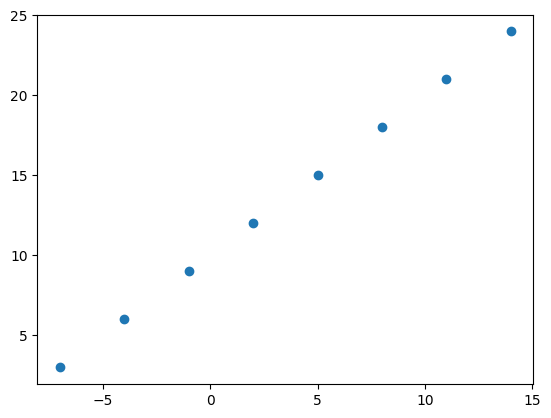

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
x[0], y[0]

(-7.0, 3.0)

In [6]:
x[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
x[0].ndim

0

In [9]:
x[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

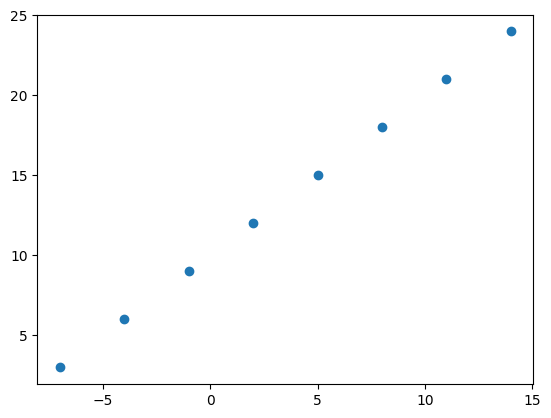

In [12]:
plt.scatter(x, y)

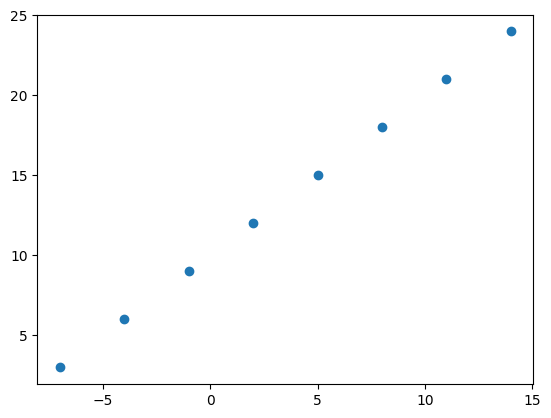

In [13]:
plt.scatter(x, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model

2. **Compiling a model** - define a loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - Letting the model try to find patterns between x & y (features and labels).

In [14]:
# Reshape your input data to be 2D
x_reshaped = tf.reshape(x, [-1, 1])  # Use tf.reshape to reshape the EagerTensor

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model using the reshaped input
model.fit(x_reshaped, y, epochs=5)  # Use x_reshaped instead of x

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 10.4175 - mae: 10.4175
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 10.2850 - mae: 10.2850
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 10.1525 - mae: 10.1525
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 10.0200 - mae: 10.0200
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 9.8875 - mae: 9.8875


In [15]:
# Check out reshaped_x and y
x_reshaped, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 118ms/step


array([[17.997128]], dtype=float32)

In [17]:
y_pred + 11

array([[28.997128]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimnization function

3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from).

In [18]:
# Reshape your input data to be 2D
x_reshaped = tf.reshape(x, [-1, 1])  # Use tf.reshape to reshape the EagerTensor

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model using the reshaped input
model.fit(x_reshaped, y, epochs=100)  # Use x_reshaped instead of x

Epoch 1/100
1/1 [==============================] - 0s 388ms/step - loss: 8.2046 - mae: 8.2046
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0721 - mae: 8.0721
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9396 - mae: 7.9396
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 7.8071 - mae: 7.8071
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 7.6746 - mae: 7.6746
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5421 - mae: 7.5421
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.4550 - mae: 7.4550
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4494 - mae: 7.4494
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4438 - mae: 7.4438
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4381 - mae: 7.4381
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - l

In [19]:
# Lets see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 96ms/step


array([[30.055634]], dtype=float32)

In [20]:
# Lets see if we can make another to improve our model
# Changing layers to 50
# changing activation to none
# Change the optimizer to Adam
# introduce learning rate to 0.01

# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

# Reshape your input data to be 2D
x_reshaped = tf.reshape(x, [-1, 1])  # Use tf.reshape to reshape the EagerTensor

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", # mae is short for mean absolute error #just writing mae is enough
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model using the reshaped input
model.fit(x_reshaped, y, epochs=100)  # Use x_reshaped instead of x

Epoch 1/100
1/1 [==============================] - 1s 719ms/step - loss: 14.3739 - mae: 14.3739
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 14.3103 - mae: 14.3103
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 14.2467 - mae: 14.2467
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 14.1832 - mae: 14.1832
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.1198 - mae: 14.1198
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 14.0564 - mae: 14.0564
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 13.9931 - mae: 13.9931
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 13.9298 - mae: 13.9298
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8666 - mae: 13.8666
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8034 - mae: 13.8034
Epoch 11/100
1/1 [==============================]

In [21]:
# Lets try to make a prediction

model.predict([17.0])

1/1 [==============================] - 0s 145ms/step


array([[26.566772]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```




When it comes to evaluation... there are 3 words you should memorize:

# > "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* the model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
# Make a bigger data set
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

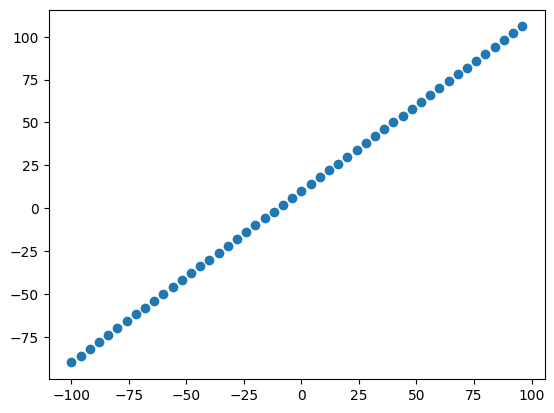

In [24]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x, y)

### The 3 sets ...

* **Training Set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [25]:
# Check the length of how many samples we have
len(x)

50

In [26]:
# Split the data into train and tests set
x_train = x[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

x_test = x[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data

Now we have got our data in training and tests set... lets visualize it again!

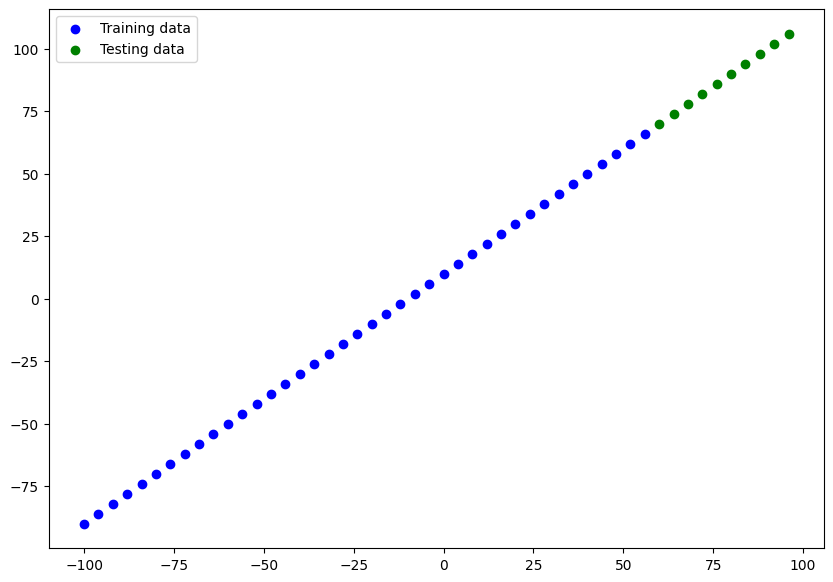

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given x, what's y?)
# Show the legend
plt.legend();

In [28]:
# Lets have a look at how to build a neural network for our data

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
# model.fit(x_train, y_train, epochs=100)

In [29]:
# Lets create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total Params - total number of parameters in the model.
* Trainable Params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in the already learned patterns or parameters from other models during **transfer learning**).

In [31]:
# Lets fit our model to the training data
model.fit(x_train, y_train, epochs=1000, verbose=0)

In [32]:
# Get the summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


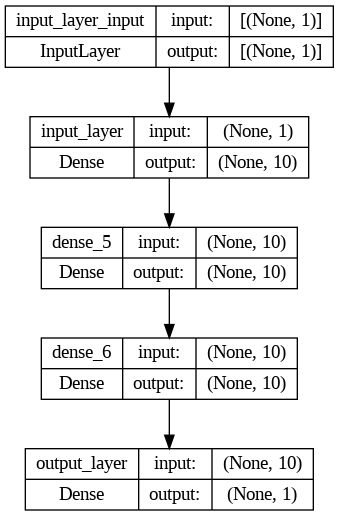

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize the predictions, it is a good idea to plot them against the ground truth labels.

Often you will see this in the form of `y_test` or `y_true` versus `y_preds` (ground truth versus your model's predictions).

In [34]:
 # Make some predictions
y_preds = model.predict(x_test)
y_preds

1/1 [==============================] - 0s 78ms/step


array([[58.316532],
       [61.98518 ],
       [65.65381 ],
       [69.32246 ],
       [72.9911  ],
       [76.65974 ],
       [80.32838 ],
       [83.997025],
       [87.66566 ],
       [91.33431 ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
# Lets create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data") # want our model to be able to predict this (given x, what's y?)
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

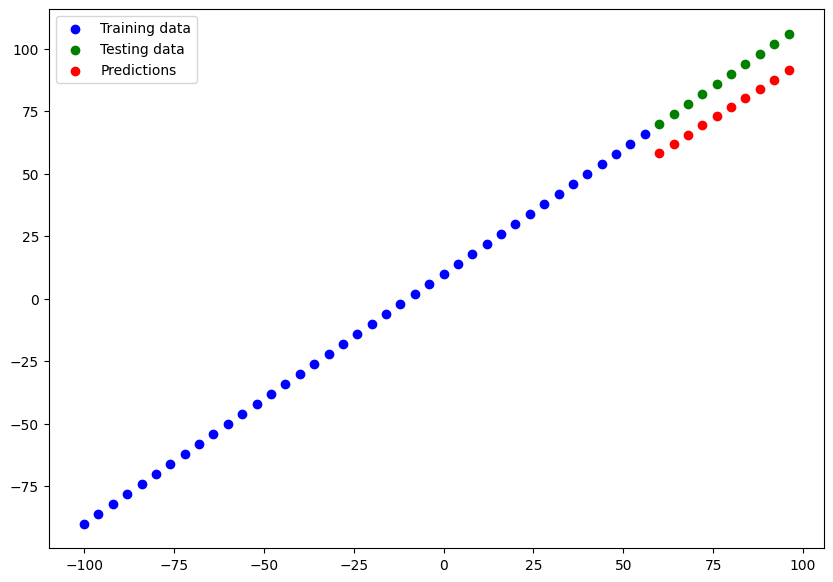

In [37]:
plot_predictions()

### Evaluating our model's predictions with regression evalution metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [38]:
# Evaluate the model on the test
o= model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 291ms/step - loss: 13.1746 - mae: 13.1746


In [39]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([70.00287], dtype=float32)>

In [40]:
tf.constant(y_pred)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[17.997128]], dtype=float32)>

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=17.997128>

In [45]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)

mae

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([70.00287], dtype=float32)>

In [46]:
#Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=y_pred)

mse

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([5032.4014], dtype=float32)>

In [47]:
#Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=Y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=Y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evalaute it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels.)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

Build `model_1`

In [51]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)